In [ ]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [81]:
f = h5py.File('faceimages.mat','r')
data = f.get('data')
data = np.array(data).T
labels = data[:,-1]
data = data[:,:-1]

In [83]:
data.shape

(400, 10304)

In [84]:
np.unique(labels)

array([0., 1.])

In [85]:
data = data - np.mean(data, axis = 0)
data.shape

(400, 10304)

In [86]:
pca = PCA()
pca.fit_transform(data.T)
pca_variance_ratio = pca.explained_variance_ratio_
pca_variance_ratio.shape

(400,)

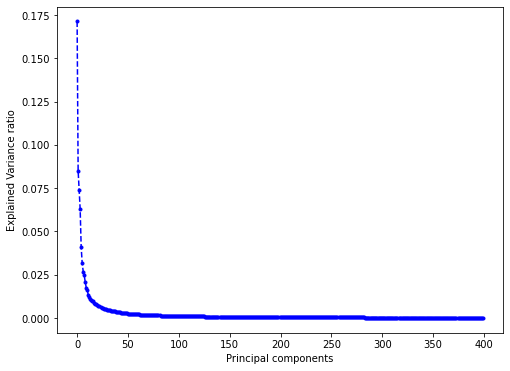

In [87]:
plt.figure(figsize=(8, 6))
plt.plot(pca_variance_ratio, 'b.--')
plt.ylabel('Explained Variance ratio')
plt.xlabel('Principal components')
plt.show()

$$Covariance  = \frac{(X-\mu)^T(X-\mu)}{m-1}$$

In [88]:
cov_matrix = (np.dot(data.T,data))/(np.size(data,0)-1)
cov_matrix.shape

(10304, 10304)

In [89]:
cov_matrix

array([[1279.32656015, 1268.83255639, 1259.75737469, ...,   21.6276817 ,
          -2.07218045,  -58.63463033],
       [1268.83255639, 1264.08210526, 1257.36784461, ...,   18.08466165,
          -5.59197995,  -62.75155388],
       [1259.75737469, 1257.36784461, 1255.29693609, ...,   18.8168797 ,
          -4.37694236,  -59.17181078],
       ...,
       [  21.6276817 ,   18.08466165,   18.8168797 , ..., 1704.12428571,
        1668.79298246, 1615.49001253],
       [  -2.07218045,   -5.59197995,   -4.37694236, ..., 1668.79298246,
        1777.20802005, 1780.6726817 ],
       [ -58.63463033,  -62.75155388,  -59.17181078, ..., 1615.49001253,
        1780.6726817 , 1939.41698622]])

In [90]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues.shape, eigenvectors.shape

((10304,), (10304, 10304))

In [91]:
eigenvalues

array([ 2.82472210e+06+0.j,  2.07070497e+06+0.j,  1.09741090e+06+0.j, ...,
        8.38849021e-14+0.j,  1.51450389e-13+0.j, -1.87953871e-13+0.j])

In [92]:
eigenvectors

array([[-2.16540447e-03+0.j,  1.46234340e-02+0.j,  1.99221269e-02+0.j,
        ..., -8.35045609e-04+0.j, -2.69449325e-04+0.j,
        -1.84997120e-03+0.j],
       [-2.06455802e-03+0.j,  1.45967027e-02+0.j,  1.98194696e-02+0.j,
        ..., -8.97145554e-06+0.j, -1.13613156e-05+0.j,
        -2.06512028e-04+0.j],
       [-2.02715357e-03+0.j,  1.45742421e-02+0.j,  1.97707151e-02+0.j,
        ..., -8.25820974e-05+0.j, -2.02516641e-05+0.j,
        -6.27726384e-05+0.j],
       ...,
       [-6.12757175e-03+0.j, -7.07647138e-03+0.j,  1.60756344e-02+0.j,
        ...,  1.25964067e-02+0.j,  1.24307967e-02+0.j,
        -1.23672510e-02+0.j],
       [-6.98050247e-03+0.j, -7.71548293e-03+0.j,  1.60106270e-02+0.j,
        ..., -4.22769494e-03+0.j,  7.01481785e-03+0.j,
        -4.69811558e-03+0.j],
       [-7.28133220e-03+0.j, -8.90895920e-03+0.j,  1.48817774e-02+0.j,
        ..., -4.04100025e-03+0.j,  6.63946748e-03+0.j,
         8.62197999e-03+0.j]])

In [93]:
def n_compPCA(feat, n_comp):
    pca = PCA(n_components=n_comp)
    pca_feat_trans = pca.fit_transform(feat)
    print('Explained variance ratio: ', sum(pca.explained_variance_ratio_))
    return pca

n_components = 5

In [183]:
pca = n_compPCA(data, 5)

Explained variance ratio:  0.4805252990232835


In [184]:
trans_data = pca.inverse_transform(pca.fit_transform(data))

In [185]:
trans_data.shape

(400, 10304)

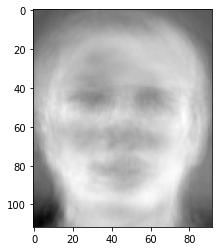

In [186]:
plt.imshow(trans_data[0].reshape((92, 112)).T, cmap=plt.cm.gray)
plt.show()

In [187]:
reconstruction_error = mean_squared_error(data, trans_data, squared=False)
print(reconstruction_error)

28.40129386672304


n_components = 10

In [178]:
pca = n_compPCA(data, 10)

Explained variance ratio:  0.5995922299709523


In [179]:
trans_data = pca.inverse_transform(pca.fit_transform(data))

In [180]:
trans_data.shape

(400, 10304)

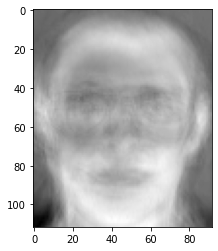

In [181]:
plt.imshow(trans_data[0].reshape((92, 112)).T, cmap=plt.cm.gray)
plt.show()

In [182]:
reconstruction_error = mean_squared_error(data, trans_data, squared=False)
print(reconstruction_error)

24.93487401609749


n_components = 50

In [173]:
pca = n_compPCA(data, 50)

Explained variance ratio:  0.8158293187369482


In [174]:
trans_data = pca.inverse_transform(pca.fit_transform(data))

In [175]:
trans_data.shape

(400, 10304)

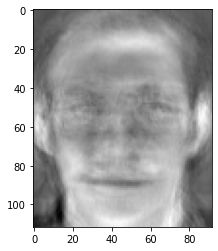

In [176]:
plt.imshow(trans_data[0].reshape((92, 112)).T, cmap=plt.cm.gray)
plt.show()

In [177]:
reconstruction_error = mean_squared_error(data, trans_data, squared=False)
print(reconstruction_error)

16.91369045588969


n_components = 100

In [168]:
pca = n_compPCA(data, 100)

Explained variance ratio:  0.8899506478211817


In [169]:
trans_data = pca.inverse_transform(pca.fit_transform(data))

In [170]:
trans_data.shape

(400, 10304)

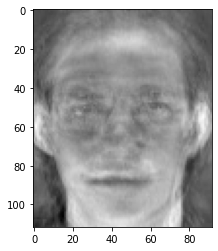

In [171]:
plt.imshow(trans_data[0].reshape((92, 112)).T, cmap=plt.cm.gray)
plt.show()

In [172]:
reconstruction_error = mean_squared_error(data, trans_data, squared=False)
print(reconstruction_error)

13.062881066684977


n_components = 400

In [160]:
pca = n_compPCA(data, 400)

Explained variance ratio:  0.9999999999999998


In [161]:
trans_data = pca.inverse_transform(pca.fit_transform(data))

In [162]:
trans_data.shape

(400, 10304)

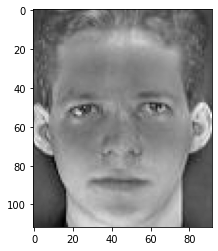

In [163]:
plt.imshow(trans_data[0].reshape((92, 112)).T, cmap=plt.cm.gray)
plt.show()

In [167]:
reconstruction_error = mean_squared_error(data, trans_data, squared=False)
print(reconstruction_error)

1.2658483227975867e-13
